In [55]:
import pandas as pd
import uuid as uid
import numpy as np

In [51]:
uid.uuid4()

UUID('0bd70b61-ffa1-4309-9822-157e7fbecb1f')

In [68]:
ID = []
for i in range(5000):
    ID.append(str(uid.uuid4()))

In [70]:
data = pd.read_csv("EACOPV2.csv")
data['tweetID'] = ID


In [71]:
user=data[['username', 'description', 'following', 'followers', 'totaltweets', 'accountCreatedAt', 'aCCOUNTiD', "tweetID"]]
tweet=data[['location', 'retweetcount', 'text', 'hashtags', 'username', "tweetID"]]

In [72]:
user.drop_duplicates(subset="username",inplace=True)
user.username.duplicated().unique()

/Users/wgl8723/Desktop/Sandbox/twitterBotDetection/.venv/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


array([False])

In [144]:
def getMentionedUsers(s):
    foundAt= False
    mentioned = []
    store = ""
    for i in range(len(s)):
        if s[i] == "@":
            foundAt = True
            start = i
            while start != len(s) and  s[start]!= " " and s[start] != "." :
                store += s[start]
                start += 1
            store = store[1:]
            mentioned.append(store)
            store = ""
    return mentioned

In [148]:
# {tweetID: [@user1, @user2, @user3, @user4, @user5, @user6]}
d=dict()
for ind in tweet.index:
    if '@' in tweet['text'][ind]:
        store = ""
        
        for e in tweet['text'][ind]:

            if e=='@':
                store += e

        # print(tweet['text'][ind])
        # d[tweet["tweetID"][ind]] = getMentionedUsers(tweet['text'][ind])
        d[tweet["username"][ind]] = getMentionedUsers(tweet['text'][ind])

In [149]:
d

{'munezero_ronie': ['MukonoGamu'],
 'Boby53560122': ['galleerie', 'Europarl_EN'],
 'KEFAH256': ['Europarl_EN'],
 'AfiegoUg': ['nbstv', 'pmuliisa21'],
 'PKOloo': ['TotalEnergies'],
 'pmuliisa21': ['galleerie', 'TotalEnergies'],
 'SocialDesignCr1': ['UGLawyer'],
 'AfricanMADI': ['TotalEnergies'],
 'ASIIMWEIGNATIU1': ['Ankunda_Barbie', 'mkainerugaba'],
 'Stella79741207': ['nup_diaspora', 'usa_nup', 'nup_de', 'Europarl_EN'],
 'felixokot': ['galleerie', 'larrouturou', '350', 'stopEACOP'],
 'spineG44': ['HillaryTaylorVI'],
 'Ankunda_Barbie': ['jumuiya', 'Europarl_EN'],
 'yusuf_mulondo': ['SimonKaggwaNjal'],
 'DrNossberg': ['TotalEnergies', 'Europarl_EN'],
 'KatendeSamuel13': ['TotalEnergies', 'Europarl_EN'],
 'GatsFred21': ['EUinUG'],
 'roykaddu': ['JohnTeira', 'Isacmpanga'],
 'HillaryTaylorVI': ['dampumuza', 'nj_ayuk', 'jordanuganda1'],
 'enockherman256': ['TotalEnergies', 'Europarl_EN'],
 'elisonk': ['azamtvtz', 'euparl_net', 'PPouyanne'],
 'R0g3rKon4t': ['HillaryTaylorVI'],
 'NKarekaho': 

In [150]:
import networkx as nx

In [157]:
G = nx.DiGraph()
G.add_nodes_from(d.keys())

labels = {
    n: (G.nodes[n]['label']
        if len(list(nx.all_neighbors(G, n))) > 5
        else '')
    for n in G.nodes
}

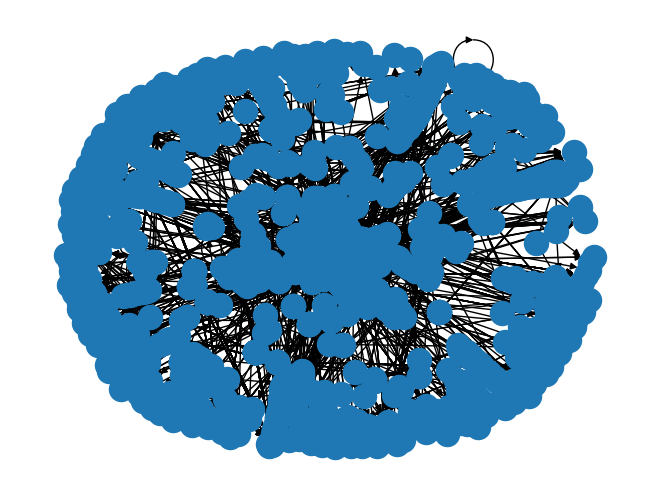

In [158]:

for k, v in d.items():
    G.add_edges_from(([(k, t) for t in v]))
nx.draw(G, with_labels=True, font_size= 10, font_weight="normal", labels=labels )